In [1]:
from utils import get_data_from_db
df = get_data_from_db()
import numpy as np

In [2]:
print(df.isna().sum())
print(df.nunique())

id                0
item_id           0
seller_id         0
target_country    0
source_country    0
shipping_type     0
active_gmv        0
timestamp         0
category_id       0
item_count        0
year              0
target            0
dtype: int64
id                1000000
item_id            978949
seller_id           26136
target_country         15
source_country         11
shipping_type           2
active_gmv         405273
timestamp          995575
category_id            50
item_count           8659
year                    4
target             915467
dtype: int64


In [3]:
print(df.active_gmv.quantile(0.01))
print(df.active_gmv.quantile(0.05))
print(df.active_gmv.quantile(0.95))
print(df.active_gmv.quantile(0.99))
print(df.active_gmv.max())

1.95
4.12
217.82
588.8402000000002
75336.3


Data looks lognormal

array([<AxesSubplot:title={'center':'A'}>,
       <AxesSubplot:title={'center':'B'}>], dtype=object)

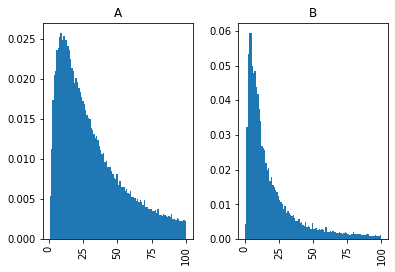

In [4]:
df[df['active_gmv'] < 100].hist("active_gmv", by=["shipping_type"], bins=100, density=True)

And now it looks closer to normal

array([<AxesSubplot:title={'center':'A'}>,
       <AxesSubplot:title={'center':'B'}>], dtype=object)

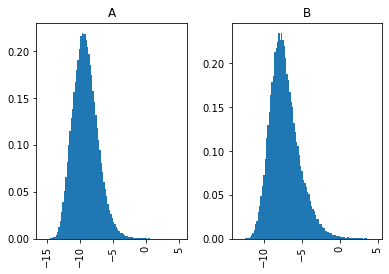

In [5]:
df['normalized_gmv'] = np.log(df['active_gmv'] / df['item_count']) 

df.hist("normalized_gmv", by=["shipping_type"], bins=100, density=True)

True